In [42]:
import pandas as pd
import numpy as np
import phik
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold
from scipy.stats import uniform, randint

import xgboost as xgb

pd.set_option('display.max_columns', None)

In [2]:
pd.set_option('display.max_colwidth', None)

task = pd.read_excel("/Users/kewenyang/Documents/GitHub/Maybank_Classification/data/Assessment.xlsx",
                       engine='openpyxl',
                       sheet_name=0)
task

,Business Problem
0,The bank is always interested to increase customer base in different segments to up sell or X-sell the products and as part of it they want to upgrade the segment of the ETB(Exsisting To Bank) customers from Normal to Affluent for Upselling the relevant products to the prospective customers and help to increase bank revenue. So as a senior data scientist need to identify the hidden affluent customers from the Data for the bank to approach them for upgrading their segment.
1,NaN
2,Instructions:
3,1. Analysis of the data
4,2. Data Processing techniques if any
5,3.Modelling Approach(Modelling techniques used atleast 2 different modelling techniques and their comparision on different Model Evaluation metrics)
6,4.Coding scripts along with output(Jupyter notebook with the outputs included). Please Use Python for coding.
7,5.Summary of the Analysis and Business recommendations if any
8,"6. Explain the high level Mlops steps on productionalizing the Model output, Monitoring and CI/CD of the model"
9,7. Provide all the above requested Information in presentation slides except for the code scripts


In [3]:
pd.set_option('display.max_colwidth', 50)

meta = pd.read_excel("/Users/kewenyang/Documents/GitHub/Maybank_Classification/data/Assessment.xlsx",
                       engine='openpyxl',
                       sheet_name=2)
meta

,Feature,Definition,Remarks
0,C_ID,Dummy customer ID,NaN
1,C_AGE,customer Age,NaN
2,C_EDU,customer Education,NaN
3,C_HSE,customer house type,NaN
4,PC,dummy postal code,NaN
5,INCM_TYP,income level code,NaN
6,gn_occ,occupation,NaN
7,NUM_PRD,number of distinct products held,"eg. Count of Savings, TD,Investment,Insurance ..."
8,CASATD_CNT,number of Current/savings(CASA) and Time depos...,NaN
9,MTHCASA,average monthly balance in CASA,NaN


In [4]:
df_raw = pd.read_excel("/Users/kewenyang/Documents/GitHub/Maybank_Classification/data/Assessment.xlsx",
                       engine='openpyxl',
                       sheet_name=1)
df_raw.head()

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
0,1443,65,Masters,EXECUTIVE CONDOMINIUM,19250.0,6.0,PMEB,3,8.0,6896.91,4899.08,910.88,1.020768e+06,105000.00,25000.00,111896.91,NaN,NaN,NaN,NaN,NaN,NaN,13.233333,NaN,NaN,NaN,NaN,NaN,34500.0,AFFLUENT
1,1559,86,O-Levels,PRIVATE CONDOMINIUM,99018.0,2.0,PMEB,4,13.0,51714.78,35740.55,1318.25,8.326420e+00,575571.97,135026.15,627286.75,NaN,NaN,NaN,NaN,NaN,NaN,727.629167,8530.88,273.44,2296.713333,27560.56,88.0,4000.0,AFFLUENT
2,1913,69,A-Levels,NaN,10155.0,3.0,PMEB,4,1.0,5420.09,5420.09,5420.09,4.106600e-01,NaN,NaN,64161.74,NaN,NaN,NaN,58424.550000,59600.88,1.0,367.389167,523.35,122.13,283.580833,3402.97,78.0,5000.0,AFFLUENT
3,2032,70,NaN,NaN,21863.0,2.0,RETIREE,3,1.0,13596.65,13596.65,13596.65,5.397180e+03,NaN,NaN,39792.30,NaN,NaN,NaN,28863.181667,33902.58,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
4,2048,72,O-Levels,EXECUTIVE CONDOMINIUM,10641.0,NaN,BLUE COLLAR,4,2.0,51639.18,32689.93,18949.25,3.607580e+03,NaN,NaN,67258.47,NaN,NaN,NaN,15060.339167,15619.29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT


In [5]:
# check target var distribution --> imbalance
df_raw.C_seg.value_counts()

C_seg
NORMAL      55157
AFFLUENT    10926
Name: count, dtype: int64

In [6]:
# check col with more missing values
missing = df_raw.isnull().any(axis=0)
missing = missing.loc[missing == True].index
missing

Index(['C_EDU', 'C_HSE', 'PC', 'INCM_TYP', 'gn_occ', 'CASATD_CNT', 'MTHCASA',
       'MAXCASA', 'MINCASA', 'DRvCR', 'MTHTD', 'MAXTD', 'HL_tag', 'AL_tag',
       'pur_price_avg', 'UT_AVE', 'MAXUT', 'N_FUNDS', 'CC_AVE',
       'MAX_MTH_TRN_AMT', 'MIN_MTH_TRN_AMT', 'AVG_TRN_AMT', 'ANN_TRN_AMT',
       'ANN_N_TRX', 'CC_LMT'],
      dtype='object')

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66083 entries, 0 to 66082
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   C_ID             66083 non-null  int64  
 1   C_AGE            66083 non-null  int64  
 2   C_EDU            27619 non-null  object 
 3   C_HSE            22167 non-null  object 
 4   PC               65597 non-null  float64
 5   INCM_TYP         36617 non-null  float64
 6   gn_occ           65205 non-null  object 
 7   NUM_PRD          66083 non-null  int64  
 8   CASATD_CNT       40991 non-null  float64
 9   MTHCASA          39045 non-null  float64
 10  MAXCASA          39045 non-null  float64
 11  MINCASA          39045 non-null  float64
 12  DRvCR            29708 non-null  float64
 13  MTHTD            14100 non-null  float64
 14  MAXTD            14100 non-null  float64
 15  Asset value      66083 non-null  float64
 16  HL_tag           2368 non-null   float64
 17  AL_tag      

In [8]:
for col in missing:
    display(f"for col - {col}:")
    display(df_raw[col].value_counts())

'for col - C_EDU:'

C_EDU
Degree                                 11222
Diploma                                 6329
O-Levels                                3928
Masters                                 2628
A-Levels                                1177
Others                                   973
Below O-Levels                           422
Professional Qualifications              383
PHD/Doctorate                            367
Technical/Vocational Qualifications      190
Name: count, dtype: int64

'for col - C_HSE:'

C_HSE
HDB 4-5 ROOM                            15257
PRIVATE CONDOMINIUM                      3431
SEMI-DETACHED                            2406
TERRACE                                   486
SHOPHOUSE                                 138
EXECUTIVE CONDOMINIUM                      98
PRIVATE APARTMENT                          97
HDB 1-3 ROOM                               95
HDB EXECUTIVE APARTMENT/ MANSIONETTE       94
BUNGALOW                                   61
INDUSTRIAL BUILDING                         1
COMMERICAL BUILDING                         1
OFFICE                                      1
HOTEL/ SERVICE APARTMENT                    1
Name: count, dtype: int64

'for col - PC:'

PC
0.0        2082
10147.0      35
34.0         31
21102.0      31
21.0         29
           ... 
58788.0       1
86142.0       1
5873.0        1
49474.0       1
41686.0       1
Name: count, Length: 16046, dtype: int64

'for col - INCM_TYP:'

INCM_TYP
2.0    9064
6.0    6493
5.0    5923
4.0    5867
3.0    5489
1.0    2424
7.0    1075
8.0     282
Name: count, dtype: int64

'for col - gn_occ:'

gn_occ
PMEB            34912
BLUE COLLAR      7552
HOUSEWIFE        5868
OTHERS           5754
WHITE COLLAR     5115
RETIREE          4800
STUDENT          1204
Name: count, dtype: int64

'for col - CASATD_CNT:'

CASATD_CNT
1.0     26017
2.0      8149
3.0      3425
4.0      1601
5.0       770
6.0       436
7.0       219
8.0       129
9.0        79
10.0       61
11.0       29
12.0       18
13.0       13
14.0       11
15.0        9
17.0        7
19.0        6
16.0        3
18.0        2
21.0        2
25.0        2
20.0        2
39.0        1
Name: count, dtype: int64

'for col - MTHCASA:'

MTHCASA
0.00        232
8.00         19
10.00        18
8.01         15
500.06       14
           ... 
371.72        1
6698.34       1
25270.94      1
1152.97       1
1417.92       1
Name: count, Length: 36944, dtype: int64

'for col - MAXCASA:'

MAXCASA
0.00        232
8.00         19
10.00        19
500.07       18
8.01         16
           ... 
3005.79       1
29903.72      1
5300.13       1
6632.71       1
1417.92       1
Name: count, Length: 36817, dtype: int64

'for col - MINCASA:'

MINCASA
0.00        286
10.00        29
500.06       26
8.00         21
8.01         17
           ... 
1789.97       1
46463.38      1
1636.95       1
2345.45       1
1417.92       1
Name: count, Length: 36435, dtype: int64

'for col - DRvCR:'

DRvCR
0.000000         1653
20000.000000      283
50000.000000      252
1000.000000       187
30000.000000      147
                 ... 
0.642756            1
692386.000000       1
729.390000          1
44.648283           1
46837.270000        1
Name: count, Length: 22558, dtype: int64

'for col - MTHTD:'

MTHTD
20000.00     1378
50000.00     1329
100000.00     862
30000.00      710
40000.00      665
             ... 
57798.22        1
284262.53       1
244171.18       1
186000.00       1
52731.19        1
Name: count, Length: 2945, dtype: int64

'for col - MAXTD:'

MAXTD
50000.00     2134
20000.00     1861
30000.00     1332
100000.00    1066
40000.00      695
             ... 
212151.67       1
28200.00        1
13733.09        1
35853.58        1
52731.19        1
Name: count, Length: 2132, dtype: int64

'for col - HL_tag:'

HL_tag
1.0    2368
Name: count, dtype: int64

'for col - AL_tag:'

AL_tag
1.0    5587
Name: count, dtype: int64

'for col - pur_price_avg:'

pur_price_avg
80000.00     29
77999.00     26
78999.00     25
60000.00     23
58000.00     21
             ..
112088.00     1
80068.66      1
153588.00     1
155126.40     1
42300.00      1
Name: count, Length: 2441, dtype: int64

'for col - UT_AVE:'

UT_AVE
28598.296667     3
33417.440000     3
15664.765000     2
55773.790000     2
25622.499167     2
                ..
79718.710000     1
494644.124170    1
17096.804167     1
16006.386667     1
16.331667        1
Name: count, Length: 2659, dtype: int64

'for col - MAXUT:'

MAXUT
36373.57     3
29659.70     3
40200.83     2
19482.35     2
29380.65     2
            ..
16600.45     1
117454.56    1
46782.44     1
83886.77     1
17.79        1
Name: count, Length: 2655, dtype: int64

'for col - N_FUNDS:'

N_FUNDS
1.0     1897
2.0      528
3.0      164
4.0       60
5.0       15
6.0        5
8.0        3
11.0       3
14.0       1
9.0        1
7.0        1
Name: count, dtype: int64

'for col - CC_AVE:'

CC_AVE
0.000000       2727
16.200000       293
13.500000       167
40.733333       131
35.333333       105
               ... 
2258.536667       1
1481.100000       1
39.101667         1
5746.651667       1
480.504167        1
Name: count, Length: 12913, dtype: int64

'for col - MAX_MTH_TRN_AMT:'

MAX_MTH_TRN_AMT
3000.00    20
1000.00    15
10.00      14
5000.00    13
2000.00    12
           ..
512.75      1
2509.76     1
226.10      1
999.84      1
6062.29     1
Name: count, Length: 11129, dtype: int64

'for col - MIN_MTH_TRN_AMT:'

MIN_MTH_TRN_AMT
10.00      124
20.00       78
50.00       43
5.00        42
2.00        41
          ... 
335.75       1
46.95        1
432.51       1
0.04         1
6062.29      1
Name: count, Length: 8651, dtype: int64

'for col - AVG_TRN_AMT:'

AVG_TRN_AMT
0.082500       7
55.333333      6
0.833333       6
4.166667       5
10.000000      5
              ..
1018.673333    1
108.655833     1
189.143333     1
94.933333      1
505.190833     1
Name: count, Length: 11536, dtype: int64

'for col - ANN_TRN_AMT:'

ANN_TRN_AMT
0.99        7
664.00      6
10.00       6
50.00       5
120.00      5
           ..
12224.08    1
1303.87     1
2269.72     1
1139.20     1
6062.29     1
Name: count, Length: 11536, dtype: int64

'for col - ANN_N_TRX:'

ANN_N_TRX
1.0      842
2.0      468
3.0      430
12.0     350
4.0      295
        ... 
613.0      1
518.0      1
334.0      1
425.0      1
443.0      1
Name: count, Length: 441, dtype: int64

'for col - CC_LMT:'

CC_LMT
0.0         29742
5000.0       1570
8000.0       1075
4000.0       1027
10000.0       959
            ...  
99100.0         1
64300.0         1
107700.0        1
55730.0         1
89500.0         1
Name: count, Length: 834, dtype: int64

In [9]:
# impute the missing value with 0
df_raw["HL_tag"].fillna(value=0, inplace=True)
df_raw["AL_tag"].fillna(value=0, inplace=True)

In [10]:
# convert categorical columns to str
nominal = ["C_EDU", "C_HSE", "gn_occ", "HL_tag", "C_seg"]
ordinal = ["INCM_TYP"]
target_name = "C_seg"
index_col = "C_ID"

for col in (nominal + ordinal):
    df_raw[col] = df_raw[col].astype(str)

df_raw.head(2)

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
0,1443,65,Masters,EXECUTIVE CONDOMINIUM,19250.0,6.0,PMEB,3,8.0,6896.91,4899.08,910.88,1.020768e+06,105000.00,25000.00,111896.91,0.0,0.0,NaN,NaN,NaN,NaN,13.233333,NaN,NaN,NaN,NaN,NaN,34500.0,AFFLUENT
1,1559,86,O-Levels,PRIVATE CONDOMINIUM,99018.0,2.0,PMEB,4,13.0,51714.78,35740.55,1318.25,8.326420e+00,575571.97,135026.15,627286.75,0.0,0.0,NaN,NaN,NaN,NaN,727.629167,8530.88,273.44,2296.713333,27560.56,88.0,4000.0,AFFLUENT


In [11]:
df_raw.HL_tag.value_counts()

HL_tag
0.0    63715
1.0     2368
Name: count, dtype: int64

In [12]:
interval_cols = [col for col in df_raw.columns if col not in (nominal + ordinal)]
interval_cols

['C_ID',
 'C_AGE',
 'PC',
 'NUM_PRD',
 'CASATD_CNT',
 'MTHCASA',
 'MAXCASA',
 'MINCASA',
 'DRvCR',
 'MTHTD',
 'MAXTD',
 'Asset value',
 'AL_tag',
 'pur_price_avg',
 'UT_AVE',
 'MAXUT',
 'N_FUNDS',
 'CC_AVE',
 'MAX_MTH_TRN_AMT',
 'MIN_MTH_TRN_AMT',
 'AVG_TRN_AMT',
 'ANN_TRN_AMT',
 'ANN_N_TRX',
 'CC_LMT']

Text(0.5, 1.0, 'Correlation matrix')

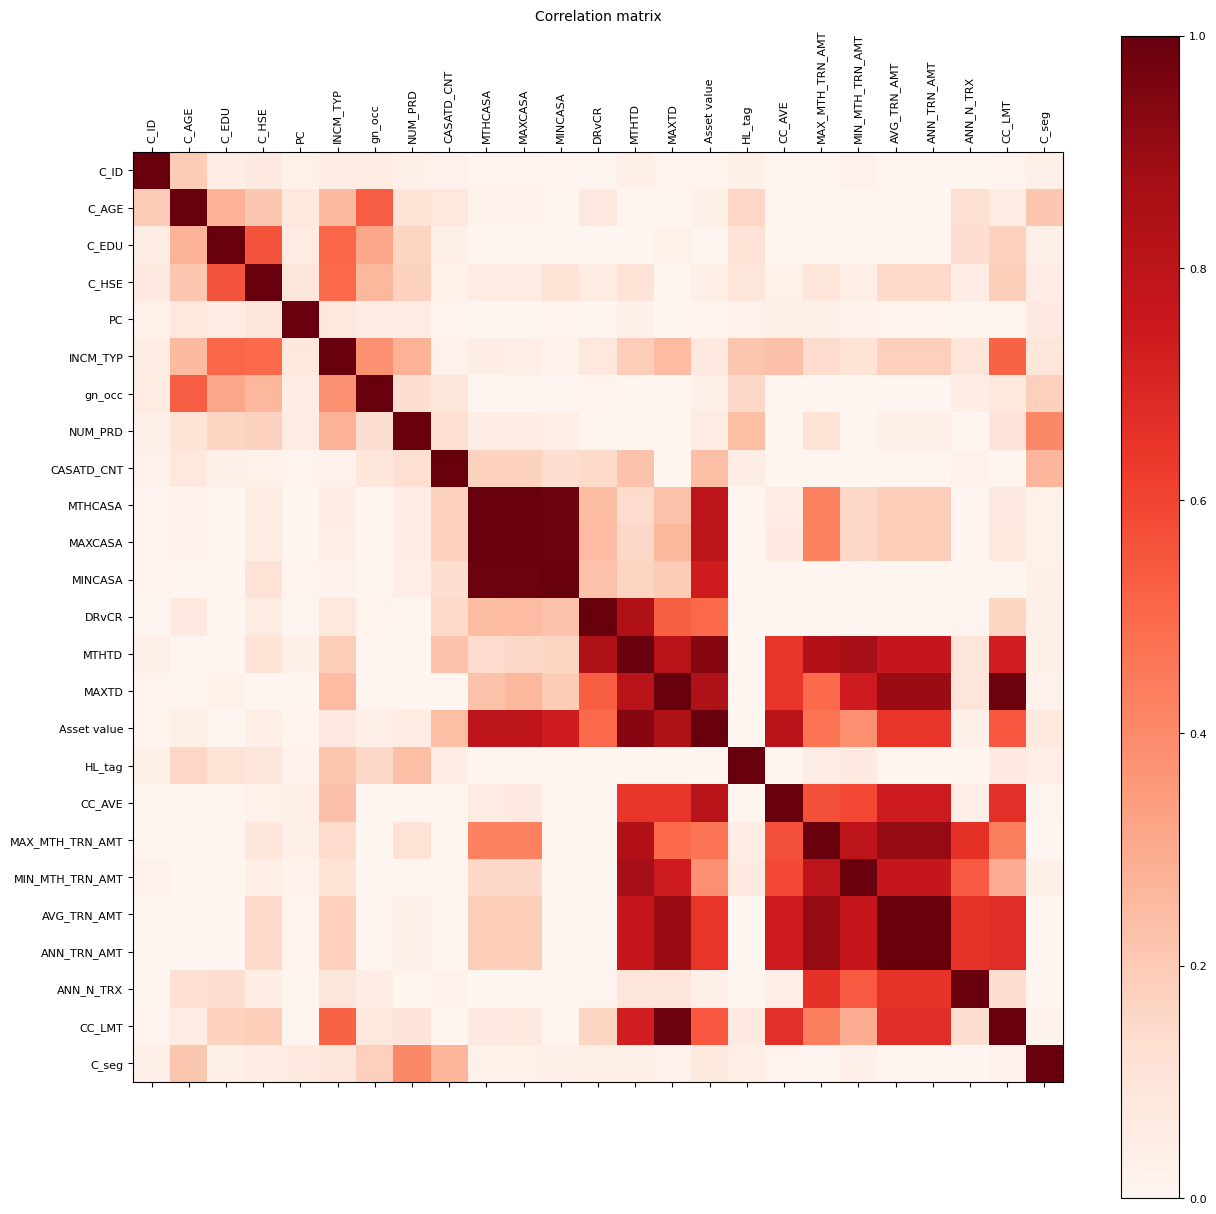

In [13]:
# explore overall correlations
df_corr = df_raw.loc[:, [c for c in df_raw.columns if c not in ["AL_tag", "pur_price_avg", "UT_AVE", "MAXUT", "N_FUNDS"]]]
phik_overview = df_corr.phik_matrix(interval_cols=interval_cols)
f = plt.figure(figsize=(15, 15))
plt.matshow(phik_overview, fignum=f.number, cmap="Reds")
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=8, rotation=90)
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation matrix', fontsize=10)

In [14]:
# C_seg is relatively more correlated with C_AGE, gn_occ, NUM_PRD, CASATD_CNT

In [15]:
# drop the customer_id
df_train = df_raw.drop([index_col], axis=1)
df_test = df_raw.drop([index_col], axis=1)

In [16]:
# apply onehotencoding for categorical variables
categorical = [col for col in (ordinal + nominal) if col != target_name]
enc = OneHotEncoder(handle_unknown='error', sparse_output=False, drop=None)

feature_arr = enc.fit_transform(df_train[categorical])
feature_labels = enc.get_feature_names_out()

# for training data
cat_train = pd.DataFrame(feature_arr, columns=feature_labels).reset_index(drop=True)
df_train = pd.concat([df_train.drop(categorical, axis=1).reset_index(drop=True), cat_train], axis=1)
display("training data after onehot encoding:", df_train.head())

# for testing data
cat_test = pd.DataFrame(enc.transform(df_test[categorical]), columns=feature_labels).reset_index(drop=True)

df_test = pd.concat([df_test.drop(categorical, axis=1).reset_index(drop=True), cat_test], axis=1)
display("testing data after onehot encoding:", df_test.head())

'training data after onehot encoding:'

,C_AGE,PC,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg,INCM_TYP_1.0,INCM_TYP_2.0,INCM_TYP_3.0,INCM_TYP_4.0,INCM_TYP_5.0,INCM_TYP_6.0,INCM_TYP_7.0,INCM_TYP_8.0,INCM_TYP_nan,C_EDU_A-Levels,C_EDU_Below O-Levels,C_EDU_Degree,C_EDU_Diploma,C_EDU_Masters,C_EDU_O-Levels,C_EDU_Others,C_EDU_PHD/Doctorate,C_EDU_Professional Qualifications,C_EDU_Technical/Vocational Qualifications,C_EDU_nan,C_HSE_BUNGALOW,C_HSE_COMMERICAL BUILDING,C_HSE_EXECUTIVE CONDOMINIUM,C_HSE_HDB 1-3 ROOM,C_HSE_HDB 4-5 ROOM,C_HSE_HDB EXECUTIVE APARTMENT/ MANSIONETTE,C_HSE_HOTEL/ SERVICE APARTMENT,C_HSE_INDUSTRIAL BUILDING,C_HSE_OFFICE,C_HSE_PRIVATE APARTMENT,C_HSE_PRIVATE CONDOMINIUM,C_HSE_SEMI-DETACHED,C_HSE_SHOPHOUSE,C_HSE_TERRACE,C_HSE_nan,gn_occ_BLUE COLLAR,gn_occ_HOUSEWIFE,gn_occ_OTHERS,gn_occ_PMEB,gn_occ_RETIREE,gn_occ_STUDENT,gn_occ_WHITE COLLAR,gn_occ_nan,HL_tag_0.0,HL_tag_1.0
0,65,19250.0,3,8.0,6896.91,4899.08,910.88,1.020768e+06,105000.00,25000.00,111896.91,0.0,NaN,NaN,NaN,NaN,13.233333,NaN,NaN,NaN,NaN,NaN,34500.0,AFFLUENT,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,86,99018.0,4,13.0,51714.78,35740.55,1318.25,8.326420e+00,575571.97,135026.15,627286.75,0.0,NaN,NaN,NaN,NaN,727.629167,8530.88,273.44,2296.713333,27560.56,88.0,4000.0,AFFLUENT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,69,10155.0,4,1.0,5420.09,5420.09,5420.09,4.106600e-01,NaN,NaN,64161.74,0.0,NaN,58424.550000,59600.88,1.0,367.389167,523.35,122.13,283.580833,3402.97,78.0,5000.0,AFFLUENT,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,21863.0,3,1.0,13596.65,13596.65,13596.65,5.397180e+03,NaN,NaN,39792.30,0.0,NaN,28863.181667,33902.58,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,72,10641.0,4,2.0,51639.18,32689.93,18949.25,3.607580e+03,NaN,NaN,67258.47,0.0,NaN,15060.339167,15619.29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


'testing data after onehot encoding:'

,C_AGE,PC,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg,INCM_TYP_1.0,INCM_TYP_2.0,INCM_TYP_3.0,INCM_TYP_4.0,INCM_TYP_5.0,INCM_TYP_6.0,INCM_TYP_7.0,INCM_TYP_8.0,INCM_TYP_nan,C_EDU_A-Levels,C_EDU_Below O-Levels,C_EDU_Degree,C_EDU_Diploma,C_EDU_Masters,C_EDU_O-Levels,C_EDU_Others,C_EDU_PHD/Doctorate,C_EDU_Professional Qualifications,C_EDU_Technical/Vocational Qualifications,C_EDU_nan,C_HSE_BUNGALOW,C_HSE_COMMERICAL BUILDING,C_HSE_EXECUTIVE CONDOMINIUM,C_HSE_HDB 1-3 ROOM,C_HSE_HDB 4-5 ROOM,C_HSE_HDB EXECUTIVE APARTMENT/ MANSIONETTE,C_HSE_HOTEL/ SERVICE APARTMENT,C_HSE_INDUSTRIAL BUILDING,C_HSE_OFFICE,C_HSE_PRIVATE APARTMENT,C_HSE_PRIVATE CONDOMINIUM,C_HSE_SEMI-DETACHED,C_HSE_SHOPHOUSE,C_HSE_TERRACE,C_HSE_nan,gn_occ_BLUE COLLAR,gn_occ_HOUSEWIFE,gn_occ_OTHERS,gn_occ_PMEB,gn_occ_RETIREE,gn_occ_STUDENT,gn_occ_WHITE COLLAR,gn_occ_nan,HL_tag_0.0,HL_tag_1.0
0,65,19250.0,3,8.0,6896.91,4899.08,910.88,1.020768e+06,105000.00,25000.00,111896.91,0.0,NaN,NaN,NaN,NaN,13.233333,NaN,NaN,NaN,NaN,NaN,34500.0,AFFLUENT,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,86,99018.0,4,13.0,51714.78,35740.55,1318.25,8.326420e+00,575571.97,135026.15,627286.75,0.0,NaN,NaN,NaN,NaN,727.629167,8530.88,273.44,2296.713333,27560.56,88.0,4000.0,AFFLUENT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,69,10155.0,4,1.0,5420.09,5420.09,5420.09,4.106600e-01,NaN,NaN,64161.74,0.0,NaN,58424.550000,59600.88,1.0,367.389167,523.35,122.13,283.580833,3402.97,78.0,5000.0,AFFLUENT,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,21863.0,3,1.0,13596.65,13596.65,13596.65,5.397180e+03,NaN,NaN,39792.30,0.0,NaN,28863.181667,33902.58,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,72,10641.0,4,2.0,51639.18,32689.93,18949.25,3.607580e+03,NaN,NaN,67258.47,0.0,NaN,15060.339167,15619.29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# label encoding for target variable
le = preprocessing.LabelEncoder()
le.fit_transform(df_train[target_name])

Y_train = pd.DataFrame(le.fit_transform(df_train[target_name]), columns=["Y"])

df_train.drop([target_name], axis=1, inplace=True)
display("training data after label encoding:", df_train.head())

df_test.drop([target_name], axis=1, inplace=True)
display("testing data after label encoding:", df_test.head())


'training data after label encoding:'

,C_AGE,PC,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,INCM_TYP_1.0,INCM_TYP_2.0,INCM_TYP_3.0,INCM_TYP_4.0,INCM_TYP_5.0,INCM_TYP_6.0,INCM_TYP_7.0,INCM_TYP_8.0,INCM_TYP_nan,C_EDU_A-Levels,C_EDU_Below O-Levels,C_EDU_Degree,C_EDU_Diploma,C_EDU_Masters,C_EDU_O-Levels,C_EDU_Others,C_EDU_PHD/Doctorate,C_EDU_Professional Qualifications,C_EDU_Technical/Vocational Qualifications,C_EDU_nan,C_HSE_BUNGALOW,C_HSE_COMMERICAL BUILDING,C_HSE_EXECUTIVE CONDOMINIUM,C_HSE_HDB 1-3 ROOM,C_HSE_HDB 4-5 ROOM,C_HSE_HDB EXECUTIVE APARTMENT/ MANSIONETTE,C_HSE_HOTEL/ SERVICE APARTMENT,C_HSE_INDUSTRIAL BUILDING,C_HSE_OFFICE,C_HSE_PRIVATE APARTMENT,C_HSE_PRIVATE CONDOMINIUM,C_HSE_SEMI-DETACHED,C_HSE_SHOPHOUSE,C_HSE_TERRACE,C_HSE_nan,gn_occ_BLUE COLLAR,gn_occ_HOUSEWIFE,gn_occ_OTHERS,gn_occ_PMEB,gn_occ_RETIREE,gn_occ_STUDENT,gn_occ_WHITE COLLAR,gn_occ_nan,HL_tag_0.0,HL_tag_1.0
0,65,19250.0,3,8.0,6896.91,4899.08,910.88,1.020768e+06,105000.00,25000.00,111896.91,0.0,NaN,NaN,NaN,NaN,13.233333,NaN,NaN,NaN,NaN,NaN,34500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,86,99018.0,4,13.0,51714.78,35740.55,1318.25,8.326420e+00,575571.97,135026.15,627286.75,0.0,NaN,NaN,NaN,NaN,727.629167,8530.88,273.44,2296.713333,27560.56,88.0,4000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,69,10155.0,4,1.0,5420.09,5420.09,5420.09,4.106600e-01,NaN,NaN,64161.74,0.0,NaN,58424.550000,59600.88,1.0,367.389167,523.35,122.13,283.580833,3402.97,78.0,5000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,21863.0,3,1.0,13596.65,13596.65,13596.65,5.397180e+03,NaN,NaN,39792.30,0.0,NaN,28863.181667,33902.58,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,72,10641.0,4,2.0,51639.18,32689.93,18949.25,3.607580e+03,NaN,NaN,67258.47,0.0,NaN,15060.339167,15619.29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


'testing data after label encoding:'

,C_AGE,PC,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,INCM_TYP_1.0,INCM_TYP_2.0,INCM_TYP_3.0,INCM_TYP_4.0,INCM_TYP_5.0,INCM_TYP_6.0,INCM_TYP_7.0,INCM_TYP_8.0,INCM_TYP_nan,C_EDU_A-Levels,C_EDU_Below O-Levels,C_EDU_Degree,C_EDU_Diploma,C_EDU_Masters,C_EDU_O-Levels,C_EDU_Others,C_EDU_PHD/Doctorate,C_EDU_Professional Qualifications,C_EDU_Technical/Vocational Qualifications,C_EDU_nan,C_HSE_BUNGALOW,C_HSE_COMMERICAL BUILDING,C_HSE_EXECUTIVE CONDOMINIUM,C_HSE_HDB 1-3 ROOM,C_HSE_HDB 4-5 ROOM,C_HSE_HDB EXECUTIVE APARTMENT/ MANSIONETTE,C_HSE_HOTEL/ SERVICE APARTMENT,C_HSE_INDUSTRIAL BUILDING,C_HSE_OFFICE,C_HSE_PRIVATE APARTMENT,C_HSE_PRIVATE CONDOMINIUM,C_HSE_SEMI-DETACHED,C_HSE_SHOPHOUSE,C_HSE_TERRACE,C_HSE_nan,gn_occ_BLUE COLLAR,gn_occ_HOUSEWIFE,gn_occ_OTHERS,gn_occ_PMEB,gn_occ_RETIREE,gn_occ_STUDENT,gn_occ_WHITE COLLAR,gn_occ_nan,HL_tag_0.0,HL_tag_1.0
0,65,19250.0,3,8.0,6896.91,4899.08,910.88,1.020768e+06,105000.00,25000.00,111896.91,0.0,NaN,NaN,NaN,NaN,13.233333,NaN,NaN,NaN,NaN,NaN,34500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,86,99018.0,4,13.0,51714.78,35740.55,1318.25,8.326420e+00,575571.97,135026.15,627286.75,0.0,NaN,NaN,NaN,NaN,727.629167,8530.88,273.44,2296.713333,27560.56,88.0,4000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,69,10155.0,4,1.0,5420.09,5420.09,5420.09,4.106600e-01,NaN,NaN,64161.74,0.0,NaN,58424.550000,59600.88,1.0,367.389167,523.35,122.13,283.580833,3402.97,78.0,5000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,21863.0,3,1.0,13596.65,13596.65,13596.65,5.397180e+03,NaN,NaN,39792.30,0.0,NaN,28863.181667,33902.58,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,72,10641.0,4,2.0,51639.18,32689.93,18949.25,3.607580e+03,NaN,NaN,67258.47,0.0,NaN,15060.339167,15619.29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# train, val, test split
X_train, X, y_train, y = train_test_split(df_train, Y_train, test_size=0.3, random_state=1, shuffle=True, stratify=Y_train)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True, stratify=y)

print(f"train set size: {X_train.shape}, \nval set size: {X_val.shape}, \ntest set size: {X_test.shape}")

train set size: (46258, 68), 
val set size: (5948, 68), 
test set size: (13877, 68)


In [48]:
# impute missing predictor values with np.nan, so that XGBoost will handle them
X_train = X_train.fillna(np.nan)
X_test = X_test.fillna(np.nan)
X_val = X_val.fillna(np.nan)

In [ ]:
# calculate sample weights
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

# parameters
objective='binary:logistic'
booster = "gbtree"
eval_metric="logloss"
early_stopping_rounds = 5

In [70]:
# Finetune Hyperparameters
params = {
    "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7],
    "gamma": uniform(0, 0.5),
    "max_depth": [3, 4, 5, 6, 7],
    "n_estimators": randint(30, 80),
    "subsample": [0.4, 0.5, 0.6, 0.7],
    "min_child_weight": [0.5, 1, 2, 3],
    "eta": [0.3, 0.1, 0.05],
}

k = StratifiedKFold(n_splits=3, shuffle=False)
scoring="f1_weighted"

cv_model = xgb.XGBClassifier(
    objective=objective,
    tree_method= "auto",
    eval_metric=eval_metric,
    booster = booster)

search = RandomizedSearchCV(
    cv_model,
    param_distributions=params,
    scoring=scoring,
    random_state=1,
    n_iter=100,  # No. of combinations
    cv=k,
    verbose=1,
    n_jobs=1,
    return_train_score=True,
    refit=False,  # refit by manual as we need to plot the train-val curve to see overfitting problem
    )

search.fit(X_train, y_train, sample_weight=sample_weights)
cv_results =  pd.DataFrame(search.cv_results_).loc[:, ["rank_test_score", "mean_test_score", "params"]].sort_values(by=["rank_test_score"])
cv_results.head(5)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           i...
                                        'eta': [0.3, 0.1, 0.05],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x2b5e80580>,
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [0.5, 1, 2, 3],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2ae090cd0>,
                                        'subsample': [0.4, 0.5, 0.6, 0.7]},
                   random_state=1, refit=False, return_train_score=True,
                   scoring='f1_weighted', verbose=1)

In [71]:
# show the best set of hyperparams
search.best_params_

{'colsample_bytree': 0.5,
 'eta': 0.3,
 'gamma': 0.28474720637268786,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 63,
 'subsample': 0.6}

In [73]:

n_estimators = 63
tree_method= "auto"
# booster = "dart"


# tuning parameters
eta = 0.3
max_depth = 7
max_leaves = 2**max_depth

# prevent overfitting
min_child_weight = 1
gamma = 0.28474720637268786
subsample = 0.6
colsample_bytree = 0.5


# Use "hist" for constructing the trees, with early stopping enabled.
model = xgb.XGBClassifier(
    early_stopping_rounds=early_stopping_rounds,
    tree_method=tree_method,
    objective=objective,
    n_estimators=n_estimators,
    missing=np.nan,
    eval_metric=eval_metric,
    booster=booster,
    eta=eta,
    max_depth=max_depth,
    max_leaves=max_leaves,
    min_child_weight=min_child_weight,
    gamma=gamma,
    subsample=subsample,
    colsample_bytree=colsample_bytree)

# Fit the model, val sets are used for early stopping.
result = model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], sample_weight=sample_weights, verbose=True)


[0]	validation_0-logloss:0.58232	validation_1-logloss:0.58174
[1]	validation_0-logloss:0.51218	validation_1-logloss:0.51267
[2]	validation_0-logloss:0.46942	validation_1-logloss:0.47042
[3]	validation_0-logloss:0.43981	validation_1-logloss:0.44182
[4]	validation_0-logloss:0.42412	validation_1-logloss:0.42753
[5]	validation_0-logloss:0.41072	validation_1-logloss:0.41540
[6]	validation_0-logloss:0.40339	validation_1-logloss:0.40900
[7]	validation_0-logloss:0.39311	validation_1-logloss:0.39947
[8]	validation_0-logloss:0.38469	validation_1-logloss:0.39294
[9]	validation_0-logloss:0.38098	validation_1-logloss:0.39040
[10]	validation_0-logloss:0.37930	validation_1-logloss:0.38921
[11]	validation_0-logloss:0.37592	validation_1-logloss:0.38758
[12]	validation_0-logloss:0.37282	validation_1-logloss:0.38595
[13]	validation_0-logloss:0.36976	validation_1-logloss:0.38389
[14]	validation_0-logloss:0.36766	validation_1-logloss:0.38381
[15]	validation_0-logloss:0.36174	validation_1-logloss:0.37991
[1

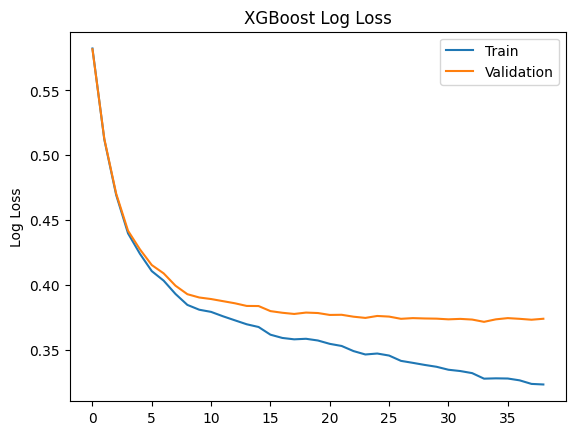

In [74]:
# check overfitting
results = result.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Validation')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

In [75]:
# predict on validation set
preds = model.predict(X_val)

# 0.848298220147063
f1_score(y_val, preds, average='weighted')

0.8516540455860826

In [77]:
# predict on test set
preds = model.predict(X_test)

# 0.8467830061904588
f1_score(y_test, preds, average='weighted')

0.8467830061904588